## Logistic Regression

- It’s a classification algorithm, that is used where the response variable is categorical. The idea of Logistic Regression is to find a relationship between features and probability of particular outcome.

  - E.g. When we have to predict if a student passes or fails in an exam when the number of hours spent studying is given as a feature, the response variable has two values, pass and fail.

- If the probability is more than 50%, it assigns the value in that particular class else if the probability is less than 50%, the value is assigned to the other class. Therefore, we can say that logistic regression acts as a binary classifier.

###### Working of a Logistic Model
For linear regression, the model is defined by:
$y = \beta_0 + \beta_1x  $       - (i)

and for logistic regression, we calculate probability, i.e. y is the probability of a given variable x belonging to a certain class. Thus, it is obvious that the value of y should lie between 0 and 1.

But, when we use equation(i) to calculate probability, we would get values less than 0 as well as greater than 1. That doesn’t make any sense
.
So, we need to use such an equation which always gives values between 0 and 1, as we desire while calculating the probability.

So here we Use Sigmoid Function

#### Sigmoid function 

We use the sigmoid function as the underlying function in Logistic regression. Mathematically and graphically, it is shown as:

<img src="1.gif" width="300">

**Why do we use the Sigmoid Function?**

1)	The sigmoid function’s range is bounded between 0 and 1. Thus it’s useful in calculating the probability for the  Logistic function.

2)	 It’s derivative is easy to calculate than other functions which is useful during gradient descent calculation.

3)	It is a simple way of introducing non-linearity to the model.


### Now Logistic function On Sigmoid Function

<img src="2.jpg" width="300">

### Logit Function
- Logistic regression can be expressed as:

<img src='3.png'>

- where, the left hand side is called the logit or log-odds function, and p(x)/(1-p(x)) is called odds.
- The odds signifies the ratio of probability of success to probability of failure. Therefore, in Logistic Regression, linear combination of inputs are mapped to the log(odds) - the output being equal to 1.

* The cost function for the whole training set is given as :

<img src='4.png' width='800'> 

## Logistic And Linear Model

<img src='05.jpg'>

# Pratical Demonstrate Of Logistic Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## Importing the dataset

In [4]:
dataset = pd.read_csv("\\Users\\budda\\Desktop\\diabetics_prediction.csv")

In [6]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
cols =dataset.columns

In [12]:
# Apply label encoding to each categorical column
for column in cols:
    dataset[column] = le.fit_transform(dataset[column])

In [14]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,22,28,0,123,350,29,1
1,1,23,19,22,0,62,196,10,0
2,8,121,17,0,0,30,368,11,1
3,1,27,19,16,62,77,53,0,0
4,0,75,4,28,102,209,514,12,1


## dataset.head()

In [16]:
X = dataset.drop(['Outcome'],axis=1)
y = dataset['Outcome']

In [18]:
X.shape,y.shape

((768, 8), (768,))

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


In [22]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [33]:
from sklearn.linear_model import LogisticRegression
c = LogisticRegression(C=1.0)
c.fit(X_train, y_train)

LogisticRegression()

## Predicting the Test set results

In [35]:
y_pred = c.predict(X_test)

In [38]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Charn","Predict Charn"])
calculation.tail(100)

,Original Charn,Predict Charn
1661,1,1
1662,1,1
1663,0,0
1664,0,0
1665,0,0
...,...,...
1756,0,0
1757,0,0
1758,0,0
1759,0,0


In [37]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score = accuracy_score(y_test,y_pred)

In [41]:
print("Accuracy score of testing data: " + str(accuracy_score))

Accuracy score of testing data: 0.7916666666666666


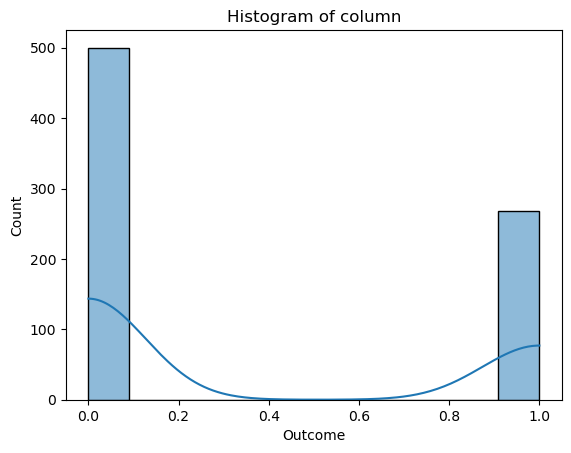

In [43]:
sns.histplot(dataset['Outcome'], kde=True)
plt.title('Histogram of column')
plt.show()

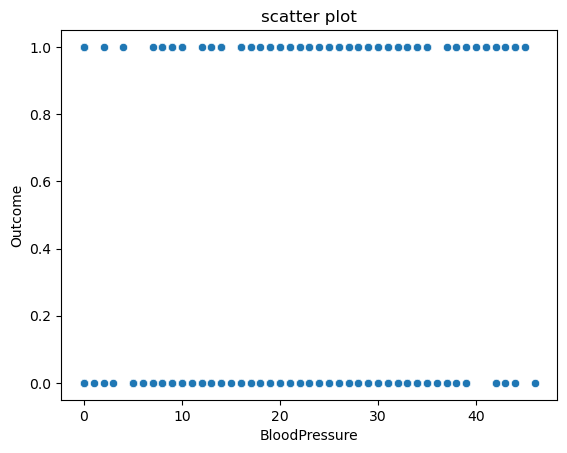

In [45]:
sns.scatterplot(x='BloodPressure', y='Outcome', data=dataset)
plt.title('scatter plot')
plt.show()
